Source: https://huggingface.co/learn/nlp-course/chapter2/4?fw=pt

# Tokenizers

https://youtu.be/VFp38yj8h3A

Tokenizers are one of the core components of the NLP pipeline. They serve one purpose: to translate text into data that cna be processed by the model. Models can only process numbers, so tokenizers need to convert our text inputs to numerical data. In this section, we'll explore exactly what happens in the tokenization pipeline.

In NLP tasks, the data that is generally processed is raw text. Here's an example of such text:

However, models can only process numbers, so we need to find a way to convert the raw text into numbers. That's what the tokenizers do, and there are a lot fow ays to go about this. The goal is to find the most meaningful representation - that is, the one that makes the most sense to the model - and, if possible, the smallest representation.

## Word-based

https://youtu.be/nhJxYji1aho

The first type of tokenizer that comes to mind is *word-based*. It's generally very easy to set up and use with only a few rules, and it often yields decent results. For example, in the image below, the goal is to split the raw text into words and find a numerical representation for eahc of them:

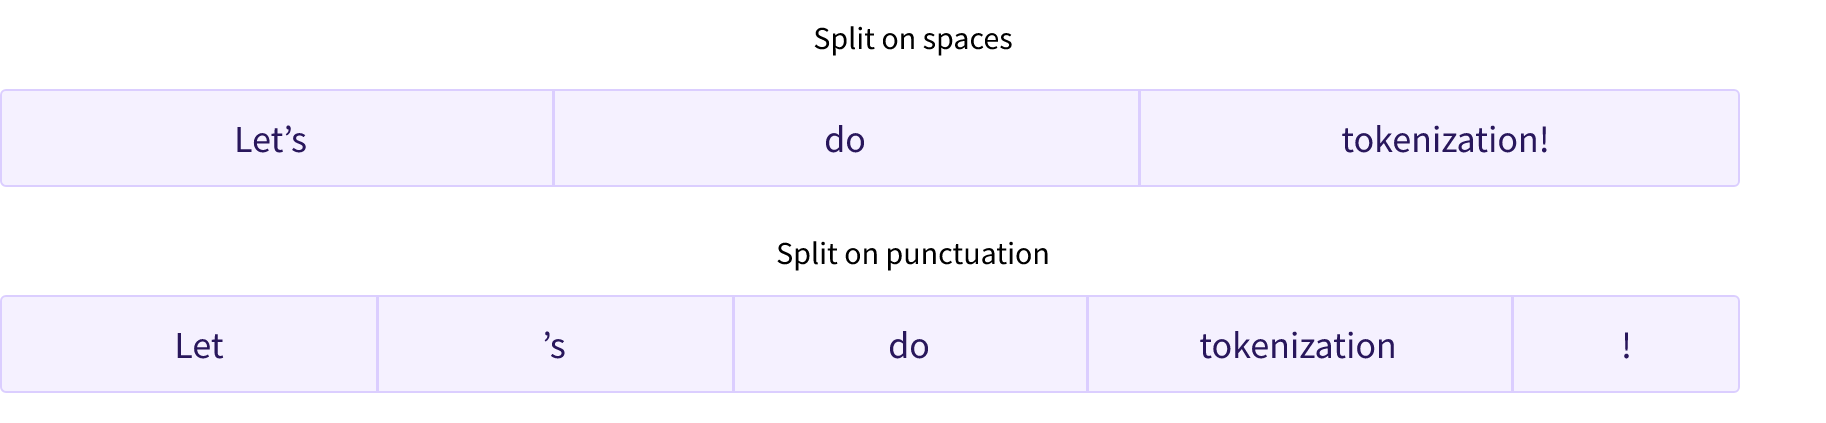

There are different ways to split the text. For example, we could use whitespace to tokenize the text into words by applying Python's split() function:

In [1]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


There are also variations of word tokenizers that have extra rules for punctuation. With this kind of tokenizer, we can end up with some pretty large "vocabularies," where a vocabulary is defined by the total number of independent tokens that we have in our corpus.

Each word gets assigned an ID, starting from 0 and going up to the size of the vocabulary. The model uses these IDs to identify each word.

If we want to completely cover a language with a word-based tokenizer, we'll need to ahve an identifier for each word in the language, which will generate a huge amount of tokens. For example, there are over 500,000 words in the English language, so to build a map from each word to an input ID we'd need to keep track of that many IDs. Furthermore, words like "dog" are represented differently from words like "dogs", and the model will initially have no way of knowing that "dog" and "dogs" are similar: it will identify the two words as unnrelated. The same applies to other similar words, like "run" and "running", which the model will not see as being similar initially.

Finally, we need a custom token to represent words that are not in our vocabulary. This is known as the "unknown" token, often represented as "[UNK]" or "". It's generally a bad sign if you see that the tokenizer is producing a lot of these tokens, as it wasn't able to retrieve a sensible representation of a word and you're losing information along the way. The goal when crafting the vocabulary is to do it in such a way that the tokenizer tokenizes as few words as possible into the unknown token.

One way to reduce the amount of unknown tokens is to go one level deeper, using a *character-based* tokenizer.

## Character-based

https://youtu.be/ssLq_EK2jLE

Character-based tokenizers split the text into characters, rather than words.  This has two primary benefits:

- The vocabulary is much smaller.
- There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.

But here too some questions arise concerning spaces and punctuation:

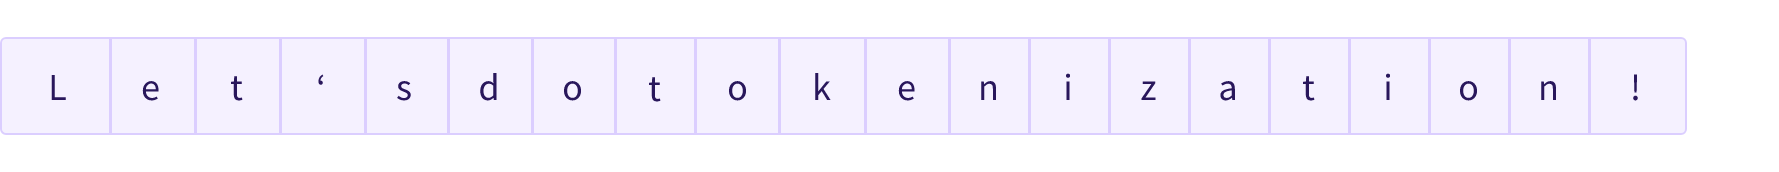

This approach isn't perfect either. Since the representation is now based on characters rather than words, one could argue that, intuitively, it's less meaningful: each character doesn't mean a lot on its own, whereas that is the case with words. However, this again differs according to the language; in Chinese, for example, each character carries more information than a character in a Latin language.

Another thing to consier is that we'll end up with a very large amount of tokens to be processed by our model: whereas a word would only be a single token with a word-based tokenizer, it can easily turn into 10 or more tokens when converted into characters.

To get the best of both worlds, we can use a third technique that combines the two approaches: *subword tokenization*.

## Subword tokenization

https://youtu.be/zHvTiHr506c

